#  TensorFlow and Keras Build various MLP architectures for MNIST dataset

In [2]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [6]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [8]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [9]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [10]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [12]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [14]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [16]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [19]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.3517 - acc: 0.9026 - val_loss: 0.3340 - val_acc: 0.9095
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.3490 - acc: 0.9030 - val_loss: 0.3313 - val_acc: 0.9097
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3464 - acc: 0.9039 - val_loss: 0.3289 - val_acc: 0.9101
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.3441 - acc: 0.9041 - val_loss: 0.3271 - val_acc: 0.9113
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3418 - acc: 0.9045 - val_loss: 0.3253 - val_acc: 0.9114
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.3397 - acc: 0.9054 - val_loss: 0.3234 - val_acc: 0.9116
Epoch 7/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.3377 - acc: 0.9056 - val_loss: 0.3220 - val_acc

Test score: 0.30642640863657
Test accuracy: 0.9148


<IPython.core.display.Javascript object>


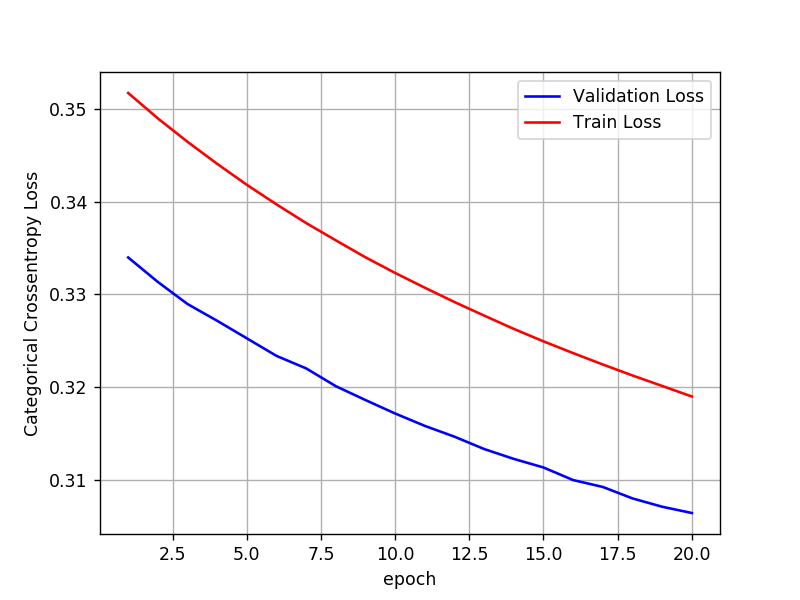

In [20]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [21]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 288us/step - loss: 2.2790 - acc: 0.2040 - val_loss: 2.2290 - val_acc: 0.3838
Epoch 2/20
60000/60000 [==============================] - 13s 213us/step - loss: 2.1881 - acc: 0.4278 - val_loss: 2.1367 - val_acc: 0.5669
Epoch 3/20
60000/60000 [==============================] - 13s 208us/step - loss: 2.0800 - acc: 0.5721 - val_loss: 2.0050 - val_acc: 0.6305
Epoch 4/20
60000/60000 [==============================] - 14s 237us/step - loss: 1.9242 - acc: 0.6430 - val_loss: 1.8182 - val_acc: 0.7021
Epoch 5/20
60000/60000 [==============================] - 13s 220us/step - loss: 1.7145 - acc: 0.6899 - val_loss: 1.5834 - val_acc: 0.7200
Epoch 6/20
60000/60000 [==============================] - 19s 323us/step - loss: 1.4763 - acc: 0.7325 - val_loss: 1.3437 - val_acc: 0.7585
Epoch 7/20
60000/60000 [==============================] - 11s 180us/step - loss: 1.2534 - acc: 0.7681 - val_loss: 1.

Test score: 0.4510295778989792
Test accuracy: 0.882


<IPython.core.display.Javascript object>


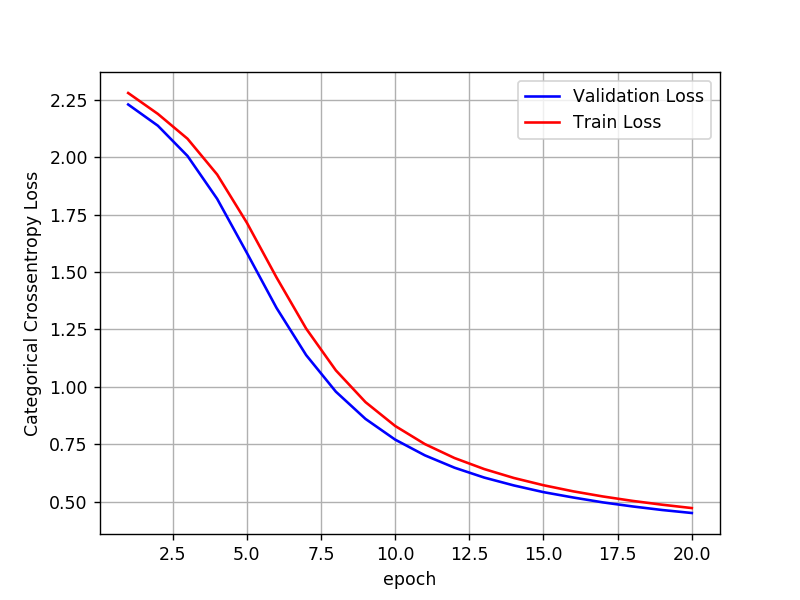

In [23]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


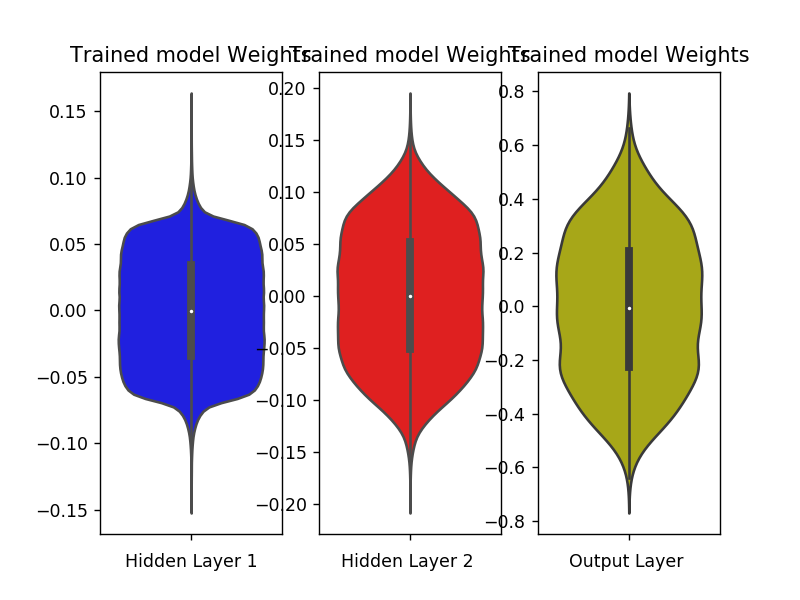

In [24]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [25]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 370us/step - loss: 0.5477 - acc: 0.8564 - val_loss: 0.2563 - val_acc: 0.9257
Epoch 2/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.2243 - acc: 0.9345 - val_loss: 0.1899 - val_acc: 0.9413
Epoch 3/20
60000/60000 [==============================] - 16s 266us/step

Test score: 0.07570469840772276
Test accuracy: 0.9806


<IPython.core.display.Javascript object>


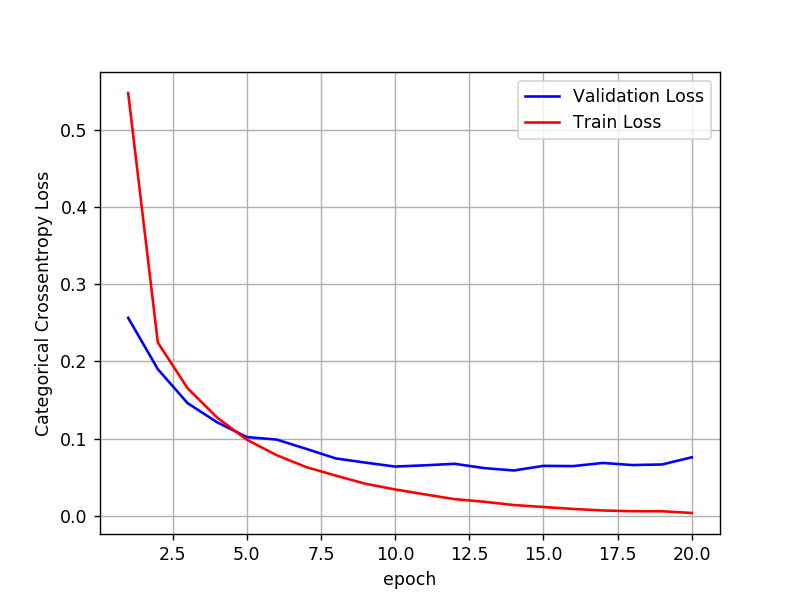

In [26]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


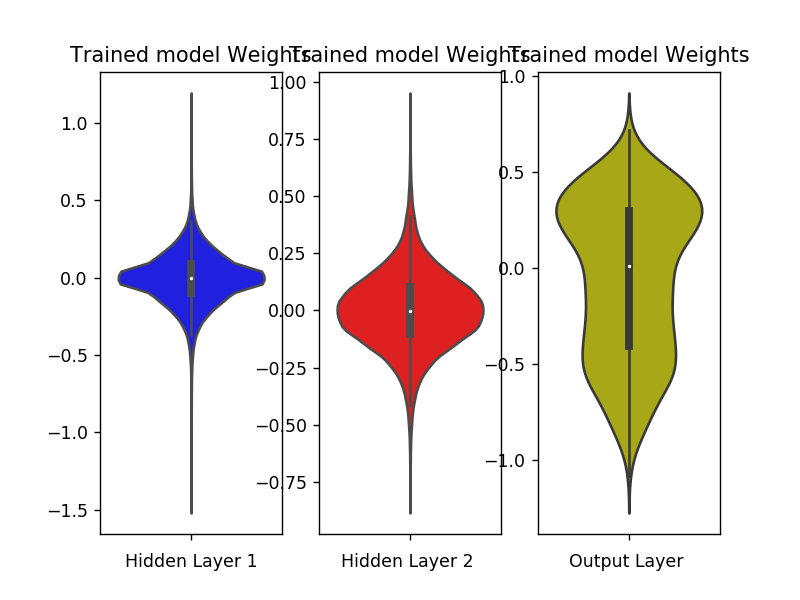

In [27]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [28]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 307us/step - loss: 0.7215 - acc: 0.7982 - val_loss: 0.3736 - val_acc: 0.9006
Epoch 2/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.3485 - acc: 0.9010 - val_loss: 0.2969 - val_acc: 0.9170
Epoch 3/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.2897 - acc: 0.9175 - val_loss: 0.2614 - val_acc: 0.9263
Epoch 4/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.2563 - acc: 0.9264 - val_loss: 0.2379 - val_acc: 0.9339
Epoch 5/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.2330 - acc: 0.9330 - val_loss: 0.2189 - val_acc: 0.9397
Epoch 6/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.2148 - acc: 0.9385 - val_loss: 0.2055 - val_acc: 0.9422
Epoch 7/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.1999 - acc: 0.9430 - val_loss: 0.

Test score: 0.1256313980385661
Test accuracy: 0.9634


<IPython.core.display.Javascript object>


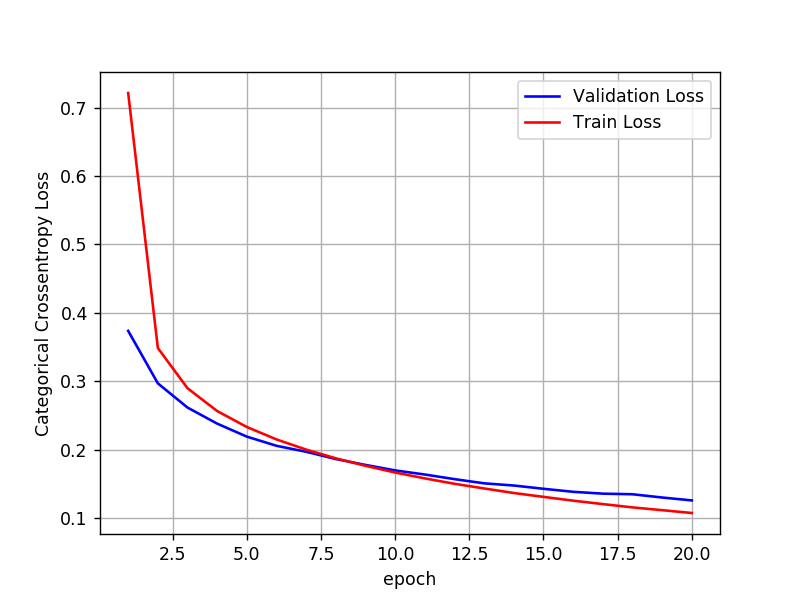

In [30]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


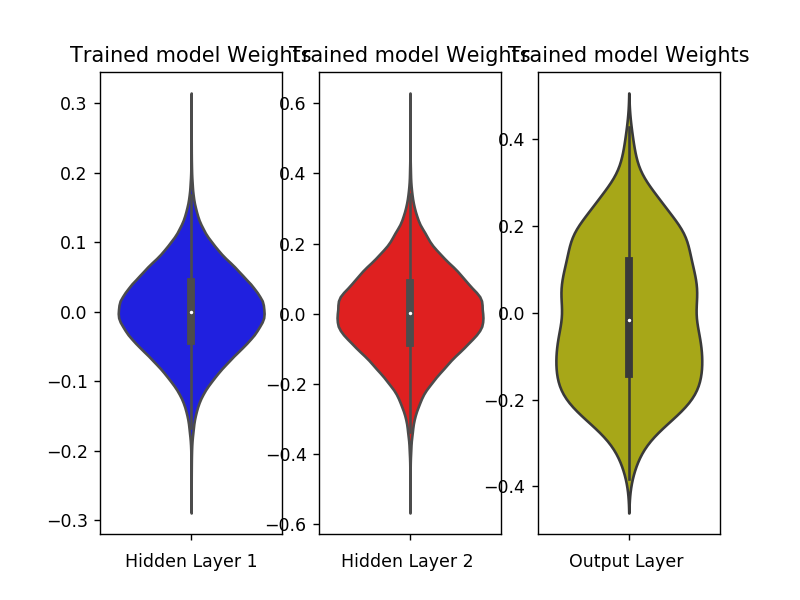

In [31]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [32]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.2299 - acc: 0.9316 - val_loss: 0.1127 - val_acc: 0.9641 1s - loss: 0.2427 - acc: 0.927 - ETA: 1s - loss:
Epoch 2/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.0837 - acc: 0.9749 - val_loss: 0.0893 - val_acc: 0.9718
Epoch 3/20
60000/6

Test score: 0.10466666469420727
Test accuracy: 0.9801


<IPython.core.display.Javascript object>


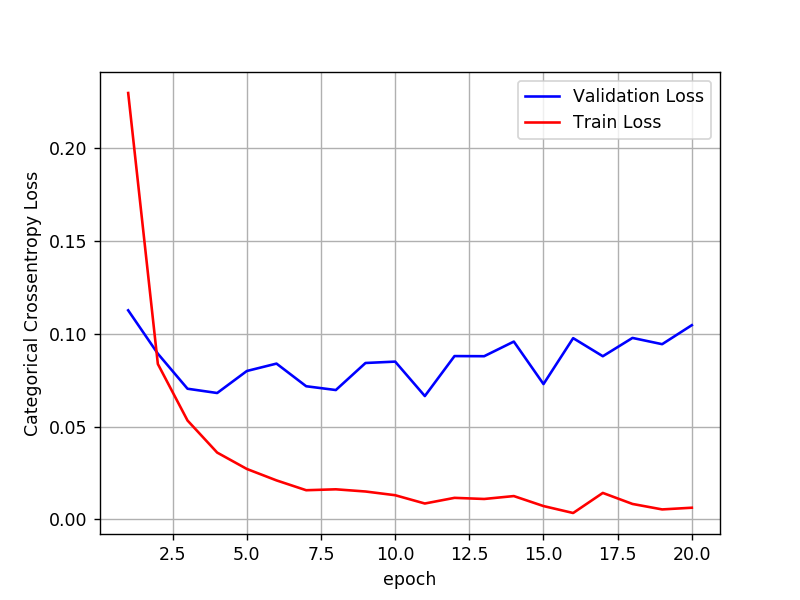

In [33]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


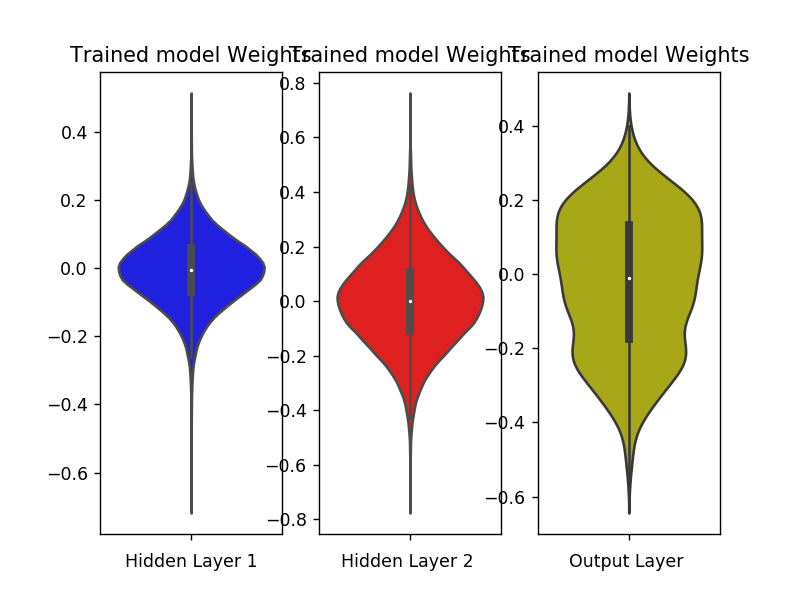

In [34]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [35]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [36]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 486us/step - loss: 0.3008 - acc: 0.9113 - val_loss: 0.2122 - val_acc: 0.9382
Epoch 2/20
60000/60000 [==============================] - 33s 542us/step - loss: 0.1756 - acc: 0.9489 - val_loss: 0.1677 - val_acc: 0.9516
Epoch 3/20
60000/60000 [==============================] - 26s 440us/step - loss: 0.1405 - acc: 0.9592 - val_loss: 0.1568 - val_acc: 0.9538
Epoch 4/20
60000/60000 [==============================] - 21s 352us/step - loss: 0.1136 - acc: 0.9667 - val_loss: 0.1392 - val_acc: 0.9581
Epoch 5/20
60000/60000 [==============================] - 24s 392us/step - loss: 0.0983 - acc: 0.9701 - val_loss: 0.1235 - val_acc: 0.9632
Epoch 6/20
60000/60000 [==============================] - 20s 332us/step - loss: 0.0812 - acc: 0.9748 - val_loss: 0.1280 - val_acc: 0.96100 - acc:
Epoch 7/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.0694 - acc: 0.9788 - val_

Test score: 0.0970754934698838
Test accuracy: 0.9761


<IPython.core.display.Javascript object>


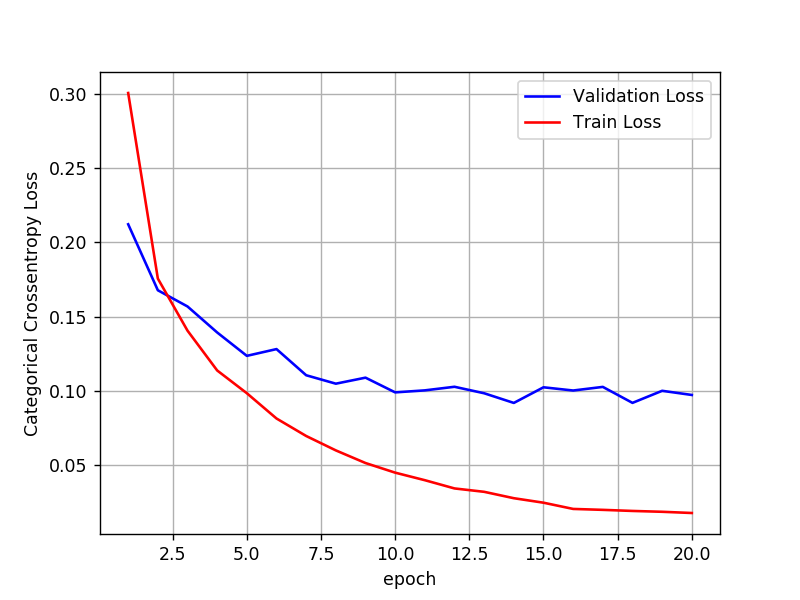

In [37]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


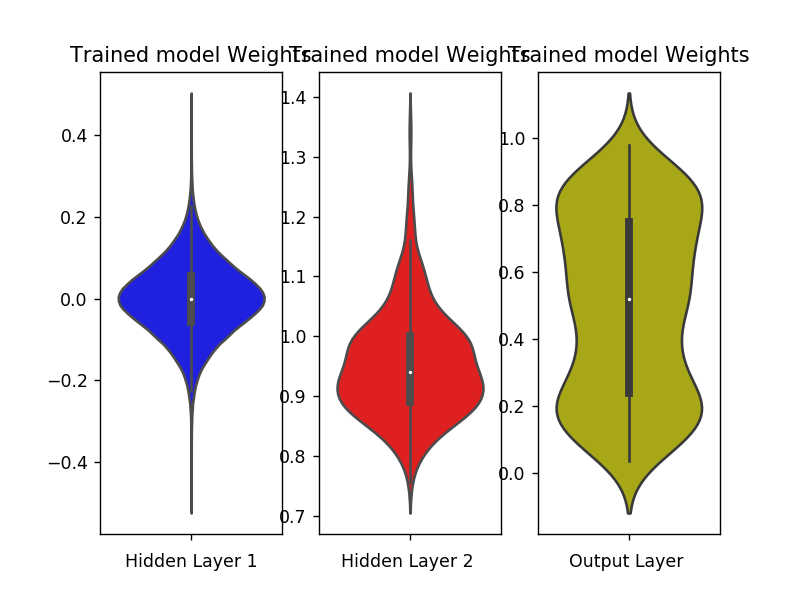

In [38]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [39]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [40]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 30s 499us/step - loss: 0.6681 - acc: 0.7933 - val_loss: 0.2821 - val_acc: 0.9161
Epoch 2/20
60000/60000 [==============================] - 20s 335us/step - loss: 0.4287 - acc: 0.8693 - val_loss: 0.2587 - val_acc: 0.9219
Epoch 3/20
60000/60000 [==============================] - 21s 348us/step - loss: 0.3816 - acc: 0.8843 - val_loss: 0.2353 - val_acc: 0.9277
Epoch 4/20
60000/60000 [==============================] - 19s 323us/step - loss: 0.3578 - acc: 0.8914 - val_loss: 0.2217 - val_acc: 0.9340
Epoch 5/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.3361 - acc: 0.8992 - val_loss: 0.2114 - val_acc: 0.9394
Epoch 6/20
60000/60000 [==============================] - 23s 376us/step - loss: 0.3216 - acc: 0.9020 - val_loss: 0.2019 - val_acc: 0.9406
Epoch 7/20
60000/60000 [==============================] - 20s 335us/step - loss: 0.3075 - acc: 0.9063 - val_loss: 0.

Test score: 0.11170987114515156
Test accuracy: 0.9652


<IPython.core.display.Javascript object>


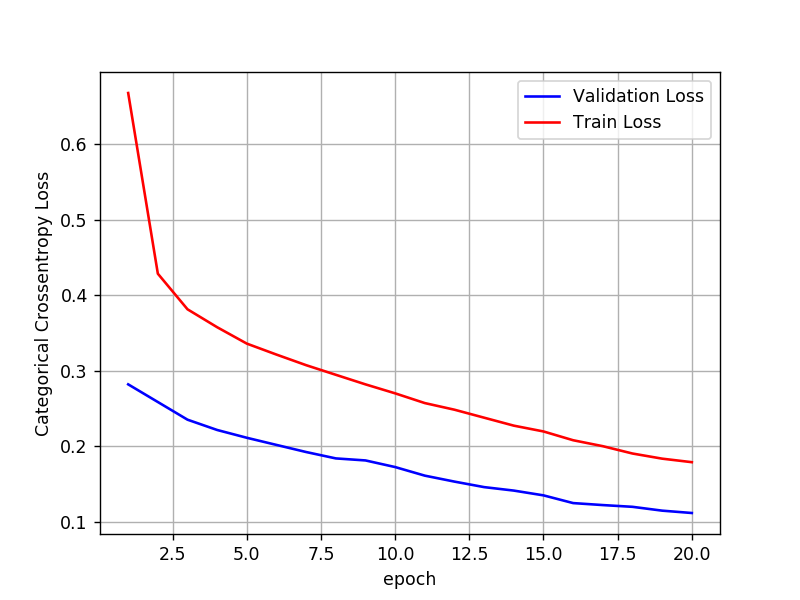

In [41]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


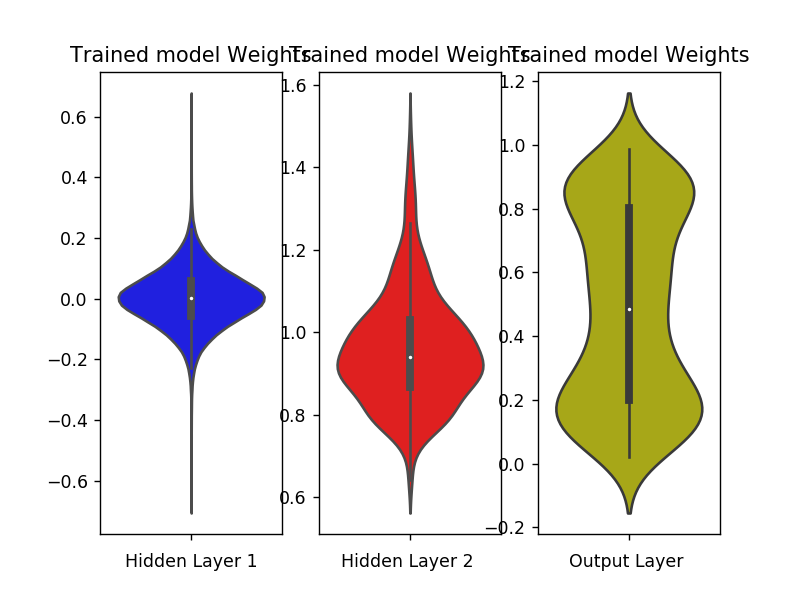

In [42]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Task 1: 2 hidden layers

<h3> MLP + ReLU + ADAM (784-360-50-10) </h3>

In [45]:
model_relu = Sequential()
model_relu.add(Dense(360, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 360)               282600    
_________________________________________________________________
dense_25 (Dense)             (None, 50)                18050     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                510       
Total params: 301,160
Trainable params: 301,160
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 313us/step - loss: 0.2617 - acc: 0.9223 - val_loss: 0.1235 - val_acc: 0.9629
Epoch 2/20
60000/60000 [==============================] - 14s 238us/step - loss: 0.1006 - acc: 0.9704 - val_loss: 0.0853 - val_acc: 0.9745
Epoch 3/20
60000/60000 [==============================] - 13s 221us

Test score: 0.10503946823413621
Test accuracy: 0.9766


<IPython.core.display.Javascript object>


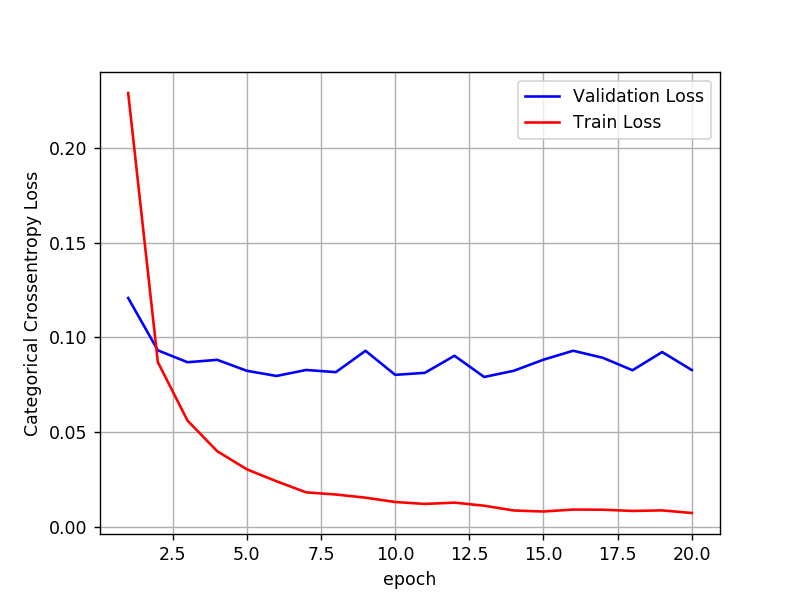

In [49]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer (784-360-50-10)</h2>

In [50]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(360, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 360)               282600    
_________________________________________________________________
batch_normalization_7 (Batch (None, 360)               1440      
_________________________________________________________________
dense_31 (Dense)             (None, 50)                18050     
_________________________________________________________________
batch_normalization_8 (Batch (None, 50)                200       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                510       
Total params: 302,800
Trainable params: 301,980
Non-trainable params: 820
_________________________________________________________________


In [53]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 412us/step - loss: 0.2286 - acc: 0.9360 - val_loss: 0.1423 - val_acc: 0.9547
Epoch 2/20
60000/60000 [==============================] - 20s 332us/step - loss: 0.0861 - acc: 0.9754 - val_loss: 0.0938 - val_acc: 0.9708
Epoch 3/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.0558 - acc: 0.9837 - val_loss: 0.0810 - val_acc: 0.9758
Epoch 4/20
60000/60000 [==============================] - 19s 322us/step - loss: 0.0399 - acc: 0.9884 - val_loss: 0.0828 - val_acc: 0.9750
Epoch 5/20
60000/60000 [==============================] - 23s 380us/step - loss: 0.0330 - acc: 0.9899 - val_loss: 0.0759 - val_acc: 0.9768
Epoch 6/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.0237 - acc: 0.9928 - val_loss: 0.0805 - val_acc: 0.9751
Epoch 7/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.0201 - acc: 0.9937 - val_loss: 0.

Test score: 0.08298968671116527
Test accuracy: 0.9794


<IPython.core.display.Javascript object>


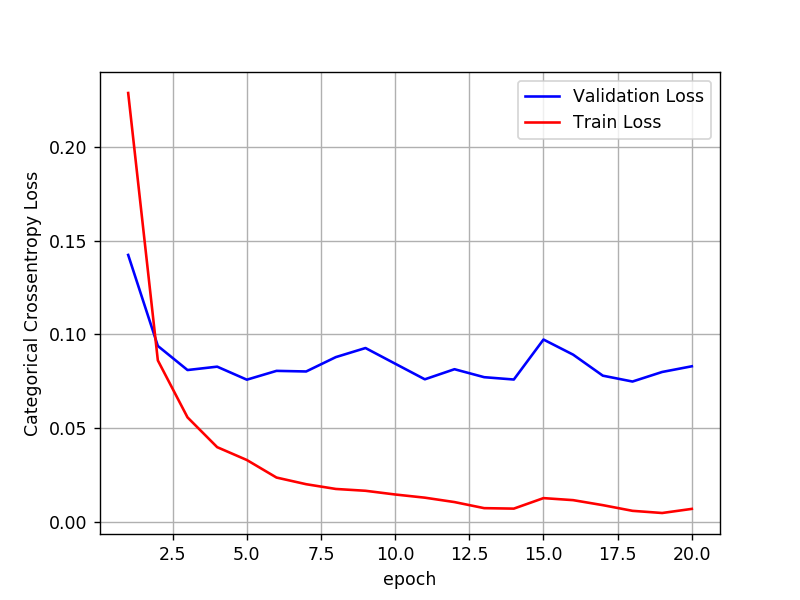

In [54]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>  MLP + Dropout + AdamOptimizer (784-360-50-10) </h2>

In [55]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1290      
Total para

In [56]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 436us/step - loss: 0.4722 - acc: 0.8563 - val_loss: 0.1639 - val_acc: 0.9489
Epoch 2/20
60000/60000 [==============================] - 18s 308us/step - loss: 0.2486 - acc: 0.9257 - val_loss: 0.1280 - val_acc: 0.9616
Epoch 3/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.2019 - acc: 0.9393 - val_loss: 0.1086 - val_acc: 0.9663
Epoch 4/20
60000/60000 [==============================] - 18s 304us/step - loss: 0.1728 - acc: 0.9478 - val_loss: 0.0906 - val_acc: 0.9709
Epoch 5/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.1511 - acc: 0.9547 - val_loss: 0.0914 - val_acc: 0.9710
Epoch 6/20
60000/60000 [==============================] - 21s 352us/step - loss: 0.1409 - acc: 0.9580 - val_loss: 0.0837 - val_acc: 0.9741
Epoch 7/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.1299 - acc: 0.9597 - val_loss: 0.

Test score: 0.059524212178983724
Test accuracy: 0.9834


<IPython.core.display.Javascript object>


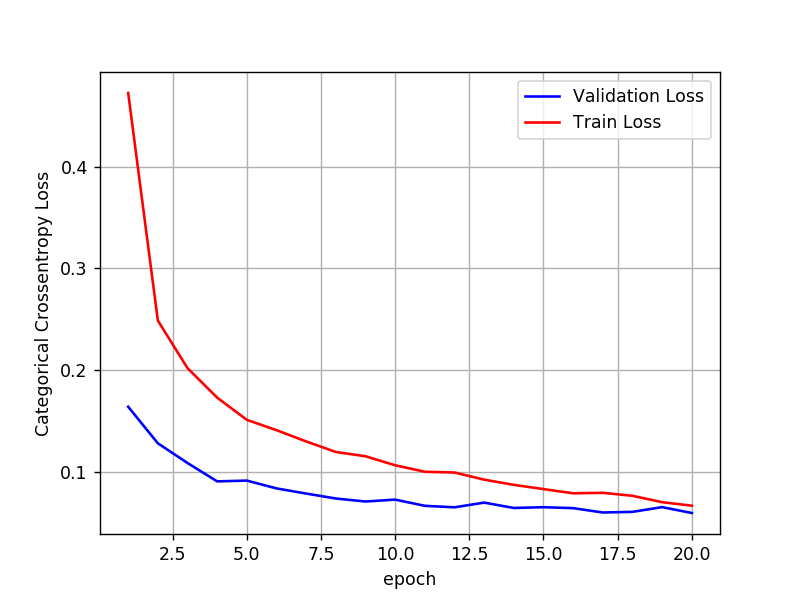

In [57]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Task 2: 3 Hidden layers (784-405-250-115-10)

<h3> MLP + ReLU + ADAM  </h3>

In [72]:
model_relu = Sequential()
model_relu.add(Dense(405, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(115, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 405)               317925    
_________________________________________________________________
dense_84 (Dense)             (None, 250)               101500    
_________________________________________________________________
dense_85 (Dense)             (None, 115)               28865     
_________________________________________________________________
dense_86 (Dense)             (None, 10)                1160      
Total params: 449,450
Trainable params: 449,450
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 42s 698us/step - loss: 0.2338 - acc: 0.9281 - val_loss: 0.1243 - val_acc: 0.9616
Epoch 2/20
60000/60000 [==============================] - 24s 402us/step - loss: 0.0851 - acc: 0.9734 - val_loss: 0.0931 - val_acc: 0.9701
Epoch 3/20
60000/60000 [==============================] - 21s 345us/step - loss: 0.0555 - acc: 0.9821 - val_loss: 0.0802 - val_acc: 0.9744
Epoch 4/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.0390 - acc: 0.9874 - val_loss: 0.0774 - val_acc: 0.9773
Epoch 5/20
60000/60000 [==============================] - 16s 275us/step - loss: 0.0285 - acc: 0.9904 - val_loss: 0.0893 - val_acc: 0.9741
Epoch 6/20
60000/60000 [==============================] - 14s 238us/step - loss: 0.0294 - acc: 0.9903 - val_loss: 0.0874 - val_acc: 0.9751
Epoch 7/20
60000/60000 [==============================] - 22s 362us/step - loss: 0.0232 - acc: 0.9923 - val_loss: 0.

Test score: 0.10629093127994114
Test accuracy: 0.9787


<IPython.core.display.Javascript object>


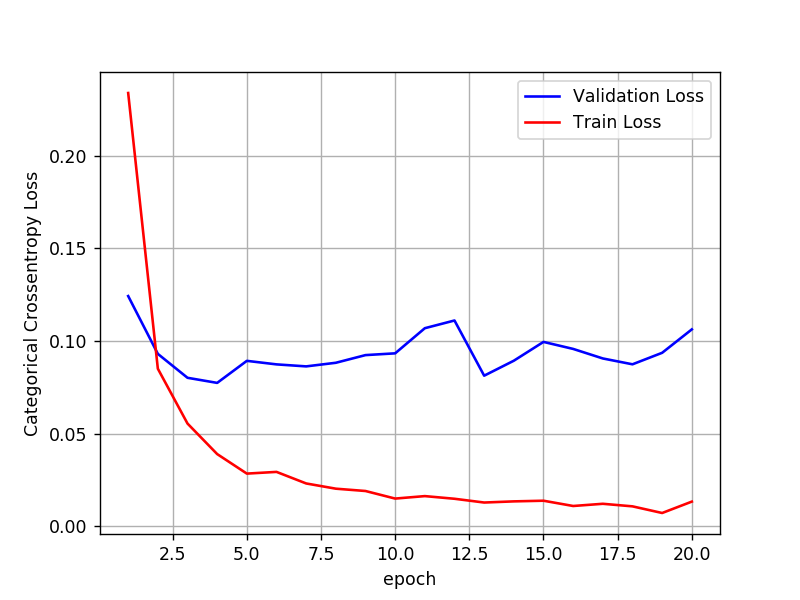

In [75]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer (784-405-250-115-10) </2>

In [76]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(405, activation='relu', input_shape=(input_dim,), 
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(250, activation='relu', 
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)) )
model_batch.add(BatchNormalization())


model_batch.add(Dense(115, activation='relu', 
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 405)               317925    
_________________________________________________________________
batch_normalization_24 (Batc (None, 405)               1620      
_________________________________________________________________
dense_92 (Dense)             (None, 250)               101500    
_________________________________________________________________
batch_normalization_25 (Batc (None, 250)               1000      
_________________________________________________________________
dense_93 (Dense)             (None, 115)               28865     
_________________________________________________________________
batch_normalization_26 (Batc (None, 115)               460       
_________________________________________________________________
dense_94 (Dense)             (None, 10)                1160      
Total para

In [77]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 39s 650us/step - loss: 0.2081 - acc: 0.9384 - val_loss: 0.1035 - val_acc: 0.9664
Epoch 2/20
60000/60000 [==============================] - 19s 321us/step - loss: 0.0760 - acc: 0.9770 - val_loss: 0.0844 - val_acc: 0.9730
Epoch 3/20
60000/60000 [==============================] - 19s 319us/step - loss: 0.0489 - acc: 0.9845 - val_loss: 0.0856 - val_acc: 0.9723
Epoch 4/20
60000/60000 [==============================] - 27s 449us/step - loss: 0.0347 - acc: 0.9890 - val_loss: 0.0814 - val_acc: 0.9732
Epoch 5/20
60000/60000 [==============================] - 35s 581us/step - loss: 0.0283 - acc: 0.9910 - val_loss: 0.0839 - val_acc: 0.9749
Epoch 6/20
60000/60000 [==============================] - 35s 587us/step - loss: 0.0228 - acc: 0.9927 - val_loss: 0.0855 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 42s 702us/step - loss: 0.0159 - acc: 0.9951 - val_loss: 0.

Test score: 0.0795468446892528
Test accuracy: 0.98


<IPython.core.display.Javascript object>


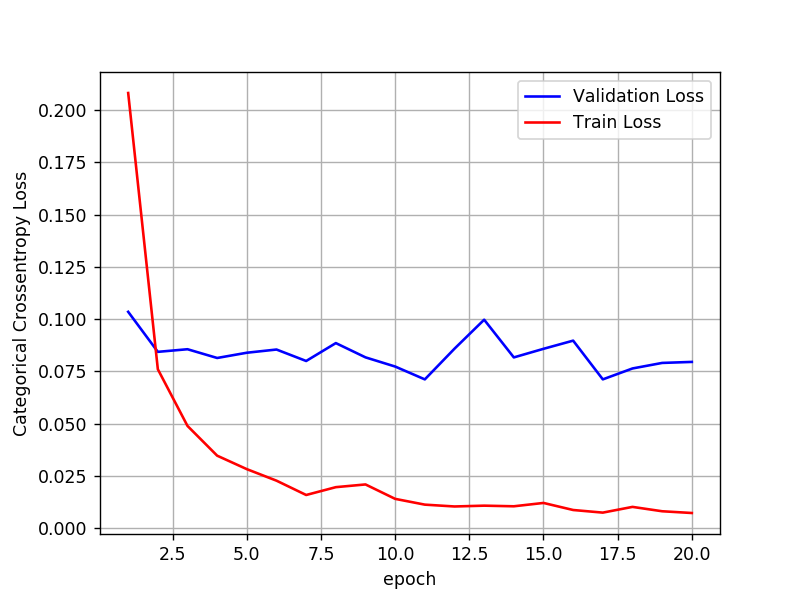

In [78]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + Dropout + AdamOptimizer (784-405-250-115-10) </h2>

In [79]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(405, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(250, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.5, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(115, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))


model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 405)               317925    
_________________________________________________________________
batch_normalization_27 (Batc (None, 405)               1620      
_________________________________________________________________
dropout_18 (Dropout)         (None, 405)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 250)               101500    
_________________________________________________________________
batch_normalization_28 (Batc (None, 250)               1000      
_________________________________________________________________
dropout_19 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 115)               28865     
__________

In [80]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 46s 762us/step - loss: 0.8226 - acc: 0.7439 - val_loss: 0.2299 - val_acc: 0.9308
Epoch 2/20
60000/60000 [==============================] - 26s 429us/step - loss: 0.3748 - acc: 0.8882 - val_loss: 0.1779 - val_acc: 0.9428
Epoch 3/20
60000/60000 [==============================] - 26s 428us/step - loss: 0.2866 - acc: 0.9163 - val_loss: 0.1379 - val_acc: 0.9570
Epoch 4/20
60000/60000 [==============================] - 25s 419us/step - loss: 0.2428 - acc: 0.9288 - val_loss: 0.1184 - val_acc: 0.9636
Epoch 5/20
60000/60000 [==============================] - 25s 418us/step - loss: 0.2122 - acc: 0.9377 - val_loss: 0.1118 - val_acc: 0.9653
Epoch 6/20
60000/60000 [==============================] - 26s 441us/step - loss: 0.1956 - acc: 0.9428 - val_loss: 0.1036 - val_acc: 0.9695
Epoch 7/20
60000/60000 [==============================] - 25s 418us/step - loss: 0.1785 - acc: 0.9476 - val_loss: 0.

Test score: 0.06811148248039535
Test accuracy: 0.9809


<IPython.core.display.Javascript object>


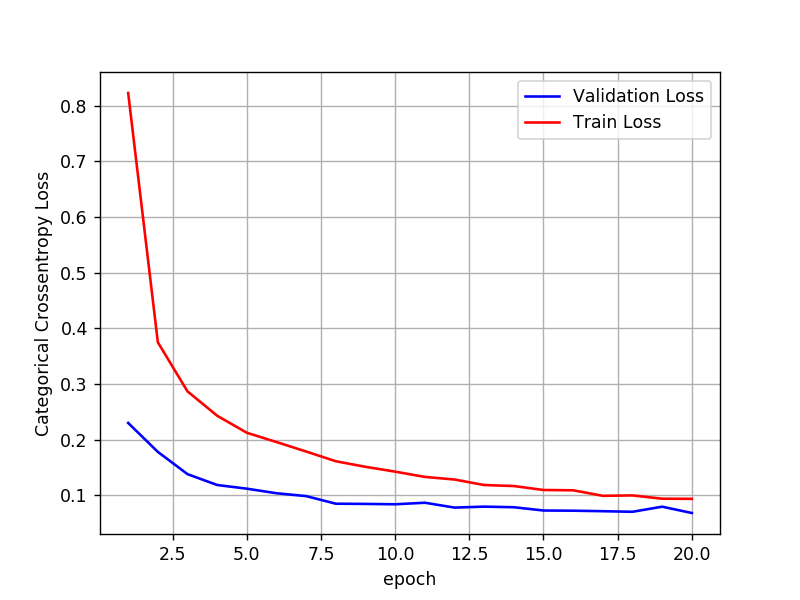

In [81]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Task 3: 5 Hidden Layers(784-405-350-215-110-55-10)

<h3> MLP + ReLU + ADAM </h3>

In [82]:
model_relu = Sequential()
model_relu.add(Dense(405, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(350, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )

model_relu.add(Dense(215, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.65, seed=None)) )

model_relu.add(Dense(110, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)) )

model_relu.add(Dense(55, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 405)               317925    
_________________________________________________________________
dense_100 (Dense)            (None, 350)               142100    
_________________________________________________________________
dense_101 (Dense)            (None, 215)               75465     
_________________________________________________________________
dense_102 (Dense)            (None, 110)               23760     
_________________________________________________________________
dense_103 (Dense)            (None, 55)                6105      
_________________________________________________________________
dense_104 (Dense)            (None, 10)                560       
Total params: 565,915
Trainable params: 565,915
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.12124889276220338
Test accuracy: 0.9767


<IPython.core.display.Javascript object>


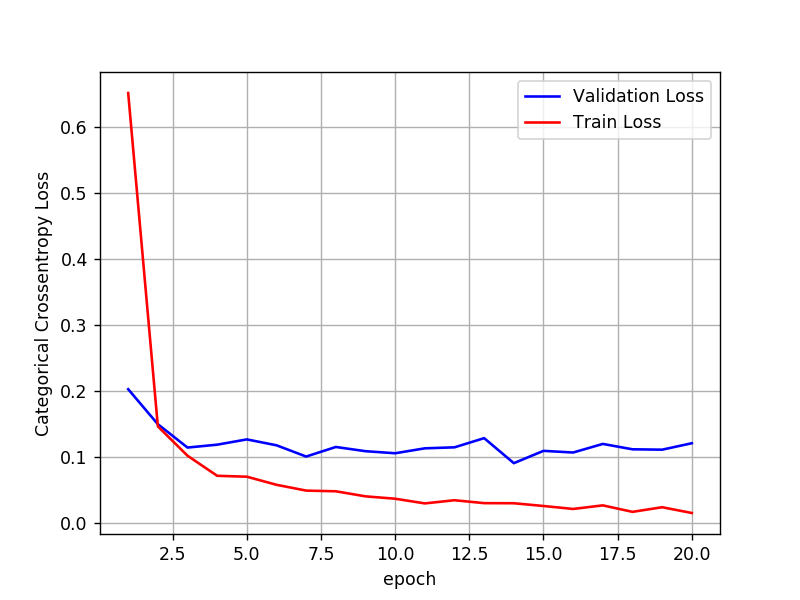

In [83]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3> MLP + Batch-Norm on hidden Layers + AdamOptimizer (784-405-350-215-110-55-10) </h3>

In [84]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(405, activation='relu', input_shape=(input_dim,), 
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(350, activation='relu', 
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(215, activation='relu', 
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )

model_batch.add(Dense(110, activation='relu', 
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(55, activation='relu', 
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 405)               317925    
_________________________________________________________________
batch_normalization_30 (Batc (None, 405)               1620      
_________________________________________________________________
dense_106 (Dense)            (None, 350)               142100    
_________________________________________________________________
batch_normalization_31 (Batc (None, 350)               1400      
_________________________________________________________________
dense_107 (Dense)            (None, 215)               75465     
_________________________________________________________________
dense_108 (Dense)            (None, 110)               23760     
_________________________________________________________________
batch_normalization_32 (Batc (None, 110)               440       
__________

In [85]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2459 - acc: 0.9294 - val_loss: 0.1185 - val_acc: 0.9640
Epoch 2/20
60000/60000 [==============================] - 43s 711us/step - loss: 0.0858 - acc: 0.9739 - val_loss: 0.1020 - val_acc: 0.9695
Epoch 3/20
60000/60000 [==============================] - 40s 673us/step - loss: 0.0590 - acc: 0.9815 - val_loss: 0.0789 - val_acc: 0.9779
Epoch 4/20
60000/60000 [==============================] - 35s 587us/step - loss: 0.0461 - acc: 0.9853 - val_loss: 0.0961 - val_acc: 0.9692
Epoch 5/20
60000/60000 [==============================] - 34s 563us/step - loss: 0.0362 - acc: 0.9884 - val_loss: 0.0717 - val_acc: 0.9786
Epoch 6/20
60000/60000 [==============================] - 40s 660us/step - loss: 0.0292 - acc: 0.9905 - val_loss: 0.0821 - val_acc: 0.9771
Epoch 7/20
60000/60000 [==============================] - 39s 647us/step - loss: 0.0283 - acc: 0.9909 - val_loss: 0.07

Test score: 0.08171314015269746
Test accuracy: 0.9798


<IPython.core.display.Javascript object>


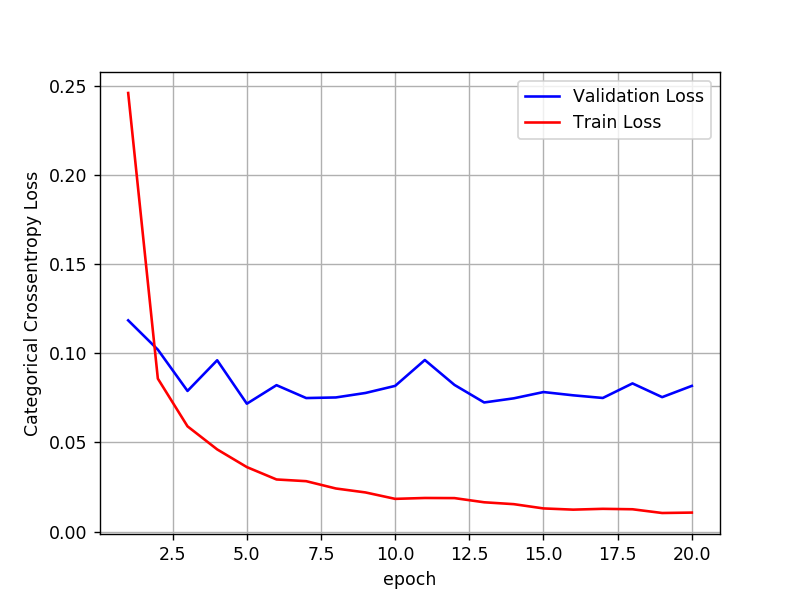

In [87]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>  MLP + Dropout + AdamOptimizer (784-405-350-215-110-55-10) </h2>

In [88]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(405, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(350, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(215, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(110, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(55, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 405)               317925    
_________________________________________________________________
batch_normalization_35 (Batc (None, 405)               1620      
_________________________________________________________________
dropout_21 (Dropout)         (None, 405)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 350)               142100    
_________________________________________________________________
batch_normalization_36 (Batc (None, 350)               1400      
_________________________________________________________________
dropout_22 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 215)               75465     
__________

In [89]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 107s 2ms/step - loss: 1.5035 - acc: 0.5129 - val_loss: 0.3943 - val_acc: 0.8932
Epoch 2/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0.6153 - acc: 0.8143 - val_loss: 0.2274 - val_acc: 0.9368
Epoch 3/20
60000/60000 [==============================] - 67s 1ms/step - loss: 0.4197 - acc: 0.8846 - val_loss: 0.1740 - val_acc: 0.9519
Epoch 4/20
60000/60000 [==============================] - 64s 1ms/step - loss: 0.3382 - acc: 0.9105 - val_loss: 0.1450 - val_acc: 0.9605
Epoch 5/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2859 - acc: 0.9262 - val_loss: 0.1394 - val_acc: 0.9631
Epoch 6/20
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2577 - acc: 0.9341 - val_loss: 0.1199 - val_acc: 0.9695
Epoch 7/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2304 - acc: 0.9416 - val_loss: 0.1236 - val_ac

Test score: 0.07309297594130039
Test accuracy: 0.9822


<IPython.core.display.Javascript object>


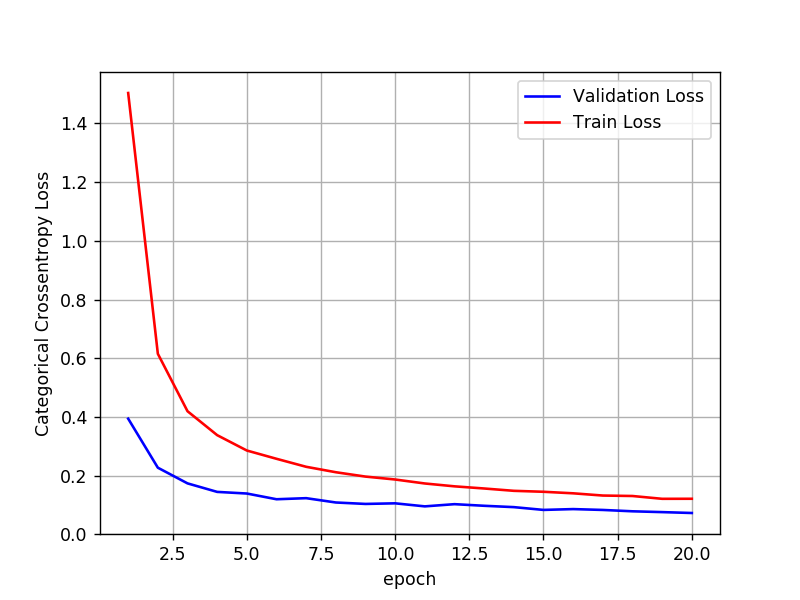

In [91]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

In [1]:
from prettytable import PrettyTable

x=PrettyTable()

x.field_names=["Hidden Layers", "Model",  "Test score", "Test Accuracy"]
x.add_row(["2", "MLP+Relu+Adam",  '0.1050', '0.9766'])
x.add_row(['2',  "MLP+Batch Normalization+ Adam", '0.082', '0.9794'])
x.add_row(['2',  "MLP+Drop Out+Adam",  '0.0605', '0.9834'])
x.add_row(['3', "MLP+Relu+Adam", '0.1062', '0.9787'])
x.add_row(['3', "MLP+Batch Normalization", '0.0795', '98'])
x.add_row(['3', "MLP+Drop Out", '0.0681', '0.9809'])
x.add_row(['5', "MLP+Relu+Adam", '0.1212', '0.9767'])
x.add_row(['5', "MLP+Batch Normaliztion", '0.0817', '0.9798'])
x.add_row(['5', "MLP+Drop Out", '0.073', '0.9822'])

print(x)

+---------------+-------------------------------+------------+---------------+
| Hidden Layers |             Model             | Test score | Test Accuracy |
+---------------+-------------------------------+------------+---------------+
|       2       |         MLP+Relu+Adam         |   0.1050   |     0.9766    |
|       2       | MLP+Batch Normalization+ Adam |   0.082    |     0.9794    |
|       2       |       MLP+Drop Out+Adam       |   0.0605   |     0.9834    |
|       3       |         MLP+Relu+Adam         |   0.1062   |     0.9787    |
|       3       |    MLP+Batch Normalization    |   0.0795   |       98      |
|       3       |          MLP+Drop Out         |   0.0681   |     0.9809    |
|       5       |         MLP+Relu+Adam         |   0.1212   |     0.9767    |
|       5       |     MLP+Batch Normaliztion    |   0.0817   |     0.9798    |
|       5       |          MLP+Drop Out         |   0.073    |     0.9822    |
+---------------+-------------------------------+---